## Project
### Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and tryalgorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

## Importing all important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV,cross_val_score

## Load the Data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

## Initial Inspection

In [3]:
df.head
print(df.shape)

(10000, 14)


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



## Data Cleaning

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.duplicated().sum()

0

##  Statistical Summary

In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


df.info()

In [11]:
corr=df.corr()

C:\Users\angel\AppData\Local\Temp\ipykernel_9932\1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

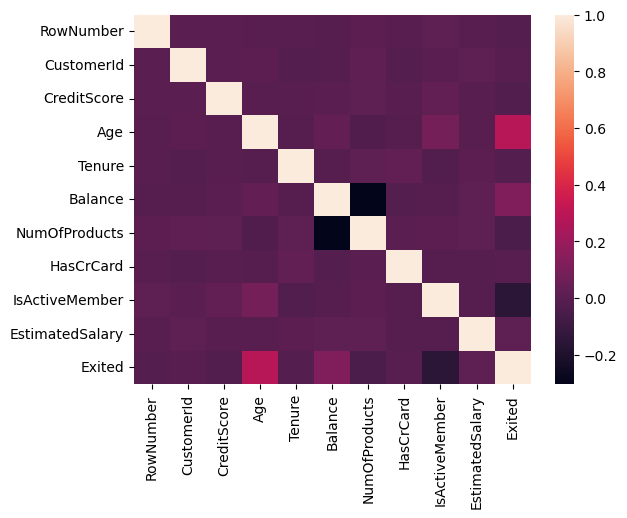

In [12]:
sns.heatmap(corr)

## Visualization

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Age Distribution')

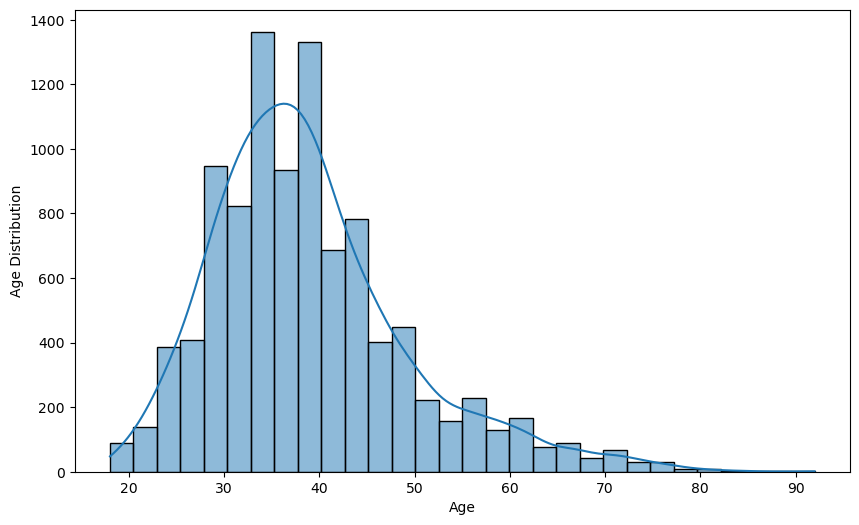

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True,bins=30)
plt.xlabel('Age')

plt.ylabel('Age Distribution')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

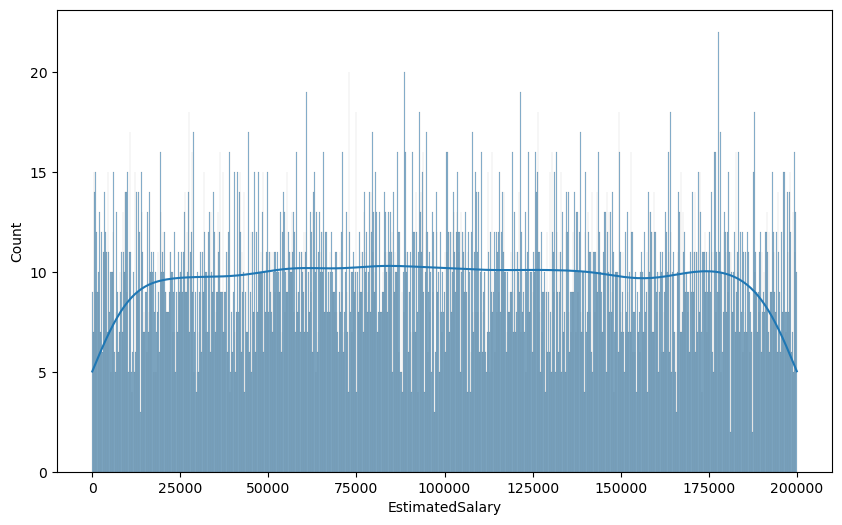

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['EstimatedSalary'],kde=True,bins=1000)

<Axes: xlabel='Gender', ylabel='count'>

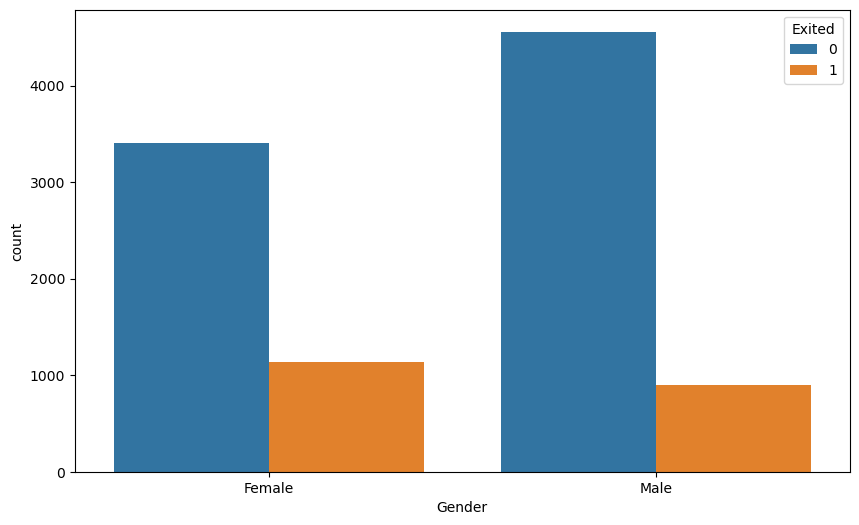

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data= df,hue='Exited')

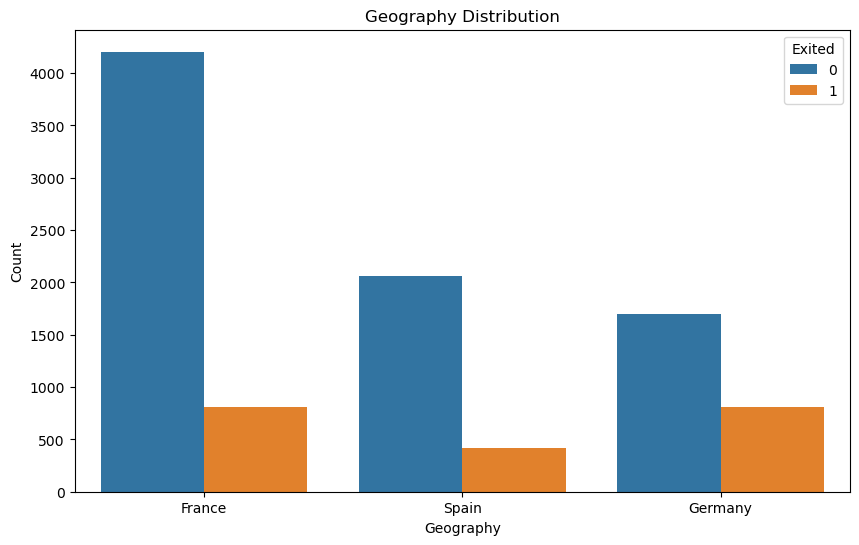

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Geography',data=df,hue='Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography Distribution')
plt.show()

([<matplotlib.axis.XTick at 0x25946a29a80>,
 [Text(0, 0, 'Not Exited'), Text(1, 0, 'Exited')])

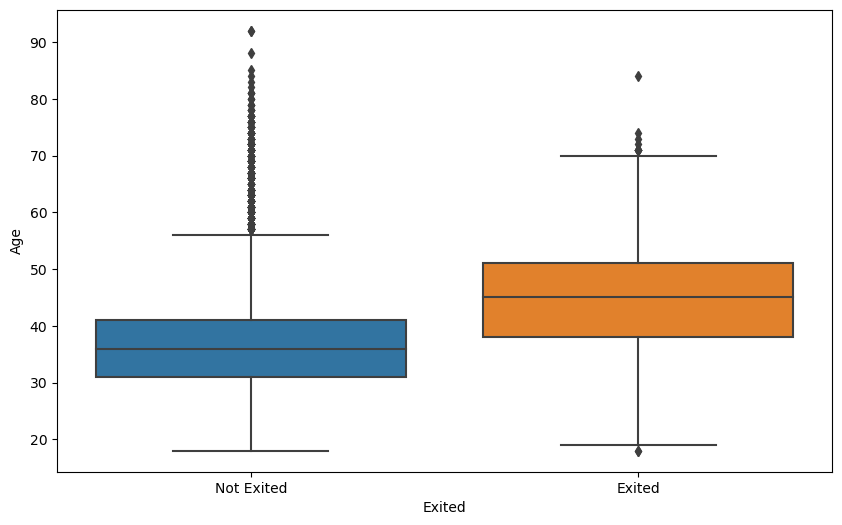

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Exited',y="Age",data=df)
plt.xticks([0,1],['Not Exited','Exited'])

<Axes: xlabel='Exited', ylabel='Age'>

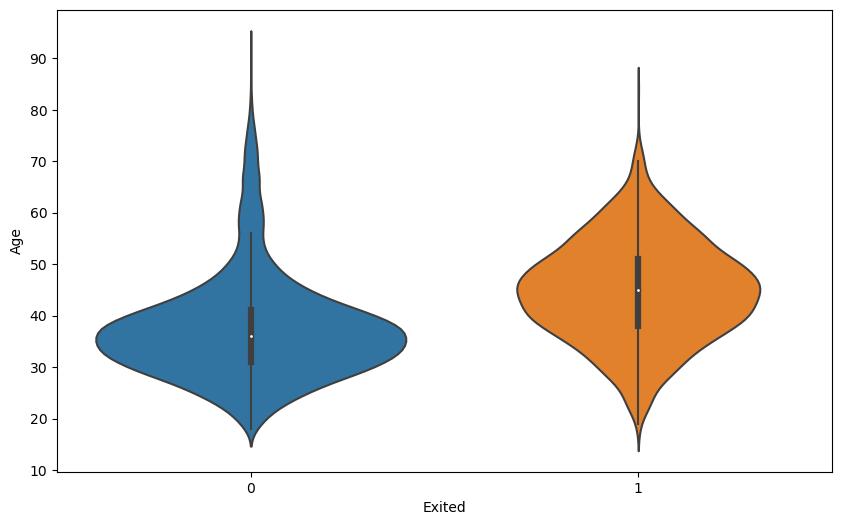

In [40]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Exited',y='Age',data=df)

<Axes: xlabel='Exited', ylabel='Age'>

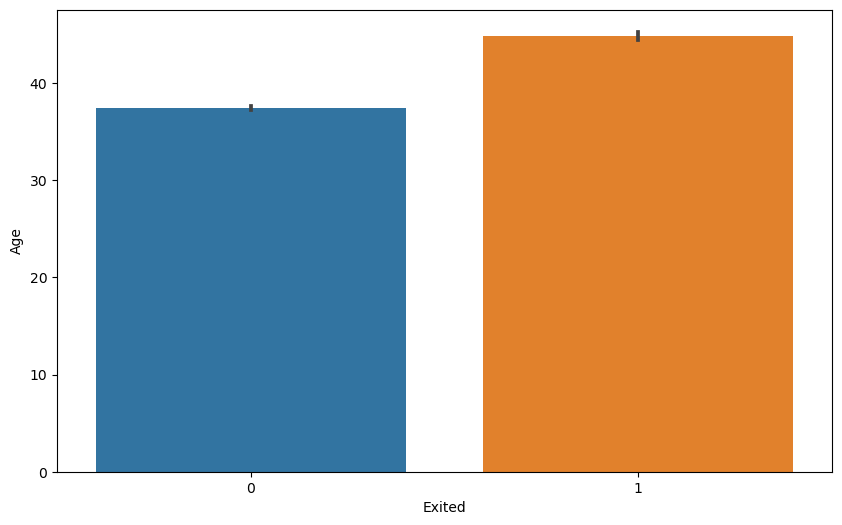

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='Exited',y='Age',data=df)

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Drop of irrelevant Columns

In [47]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [48]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dealing with Imbalance data with SMOTE

In [65]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE(random_state=42)

## OneHotencoding

In [51]:
new_df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [52]:
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [53]:
from sklearn.model_selection import train_test_split

In [59]:
x=new_df.drop(columns=['Exited'])

In [60]:
y=new_df['Exited']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [79]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8856,774,26,5,0.00,2,1,1,64716.08,0,0,0
1545,602,42,6,158414.85,1,1,1,131886.46,1,0,0
8136,716,38,1,0.00,2,1,1,99661.46,0,0,0
7768,601,20,9,122446.61,2,1,0,86791.90,0,1,0
7782,585,54,8,87105.32,1,1,1,55346.14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1099,494,38,7,0.00,2,1,1,6203.66,0,1,1
2514,592,26,4,105082.07,2,1,0,132801.57,1,0,0
6637,850,36,3,0.00,2,1,0,195033.07,0,0,1
2575,551,54,5,102994.04,1,1,0,176680.16,1,0,1


In [80]:
y_train

8856    0
1545    0
8136    0
7768    0
7782    0
       ..
1099    0
2514    0
6637    0
2575    1
7336    0
Name: Exited, Length: 8000, dtype: int64

In [81]:
x_train_res,y_train_res = smote.fit_resample(X=x_train,y=y_train)

In [101]:
x_train_res.shape

(12692, 11)

In [82]:
y_train_res.value_counts()

0    6346
1    6346
Name: Exited, dtype: int64

## Scaling of the data

In [83]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()

In [95]:
X_train = scaler.fit_transform(x_train_res)
X_test = scaler.transform(x_test)

C:\Users\angel\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [100]:
X_train.shape

(12692, 11)

## LogisticRegression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr=LogisticRegression()

In [102]:
lr.fit(X_train,y_train_res)

LogisticRegression()

In [104]:
y_pred = lr.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [107]:
accuracy_score(y_test,y_pred)

0.716

In [109]:
f1_score(y_test,y_pred)

0.36465324384787473

In [110]:
recall_score(y_test,y_pred)

0.4255874673629243

In [111]:
precision_score(y_test,y_pred)

0.31898238747553814

## SVC

In [112]:
from sklearn import svm

In [113]:
svm = svm.SVC()

In [114]:
svm.fit(X_train,y_train_res)

SVC()

In [122]:
y_pred1=svm.predict(x_test)

In [123]:
accuracy_score(y_test,y_pred1)

0.8075

In [124]:
f1_score(y_test,y_pred1)

0.5549132947976878

In [125]:
recall_score(y_test,y_pred1)

0.6266318537859008

In [126]:
precision_score(y_test,y_pred1)

0.4979253112033195

## KNeighbors Classifier

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier()

In [129]:
knn.fit(X_train,y_train_res)

KNeighborsClassifier()

In [135]:
y_pred2=knn.predict(x_test)

In [136]:
accuracy_score(y_test,y_pred2)

0.7695

In [137]:
recall_score(y_test,y_pred2)

0.5744125326370757

In [138]:
f1_score(y_test,y_pred2)

0.48834628190898993

In [139]:
precision_score(y_test,y_pred2)

0.4247104247104247

## Decision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt = DecisionTreeClassifier()

In [142]:
dt.fit(X_train,y_train_res)

DecisionTreeClassifier()

In [143]:
y_pred3 = dt.predict(x_test)

In [144]:
accuracy_score(y_test,y_pred3)

0.7555

In [145]:
recall_score(y_test,y_pred3)

0.5587467362924282

In [146]:
precision_score(y_test,y_pred3)

0.40074906367041196

In [147]:
precision_score(y_test,y_pred3)

0.40074906367041196

## Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfc = RandomForestClassifier()

In [150]:
rfc.fit(X_train,y_train_res)

RandomForestClassifier()

In [152]:
y_pred4=rfc.predict(x_test)

In [153]:
accuracy_score(y_test,y_pred4)

0.8215

In [154]:
recall_score(y_test,y_pred4)

0.5691906005221932

In [155]:
precision_score(y_test,y_pred4)

0.5317073170731708

In [156]:
f1_score(y_test,y_pred4)

0.5498108448928122

## Gradient Boosting Classifier

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
gbc = GradientBoostingClassifier()

In [160]:
gbc.fit(X_train,y_train_res)

GradientBoostingClassifier()

In [161]:
y_pred5=gbc.predict(x_test)

In [162]:
accuracy_score(y_test,y_pred5)

0.8125

In [163]:
recall_score(y_test,y_pred5)

0.6318537859007833

In [164]:
precision_score(y_test,y_pred5)

0.5084033613445378

In [165]:
f1_score(y_test,y_pred5)

0.5634458672875438

In [166]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[
             accuracy_score(y_test,y_pred),
             accuracy_score(y_test,y_pred1),
             accuracy_score(y_test,y_pred2),
              accuracy_score(y_test,y_pred3),
     accuracy_score(y_test,y_pred4),
     accuracy_score(y_test,y_pred5),
]})

In [167]:
final_data

,Models,ACC
0,LR,0.7160
1,SVC,0.8075
2,KNN,0.7695
3,DT,0.7555
4,RF,0.8215
5,GBC,0.8125


<Axes: xlabel='Models', ylabel='ACC'>

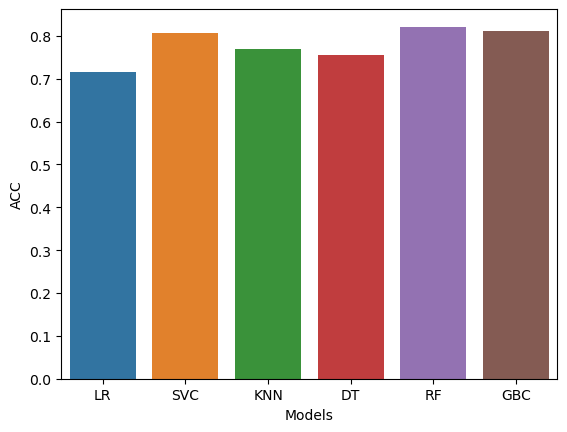

In [168]:
sns.barplot(x='Models',y='ACC',data=final_data)

## So, here we decided to take Random Forest as our BaseModel

## lets try to improve the accuracy of the model

In [169]:
# no. of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# max no. of levels in tree
max_depth = [2,8,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimumm numbers required to split a node
min_samples_split = [2,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

In [170]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_samples':max_samples,
             'max_depth':max_depth,
             'bootstrap':bootstrap,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [171]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
rf_grid = RandomizedSearchCV(estimator=rfc,
                            param_distributions=param_grid,
                             cv = 5,
                             verbose=2,
                             n_jobs = -1
                            )

In [175]:
rf_grid.fit(X_train,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\angel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\angel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\angel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [176]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [177]:
rf_grid.best_score_

0.8559802929306756

In [178]:
rf_grid.predict(x_test)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

## Save the model

In [179]:
import joblib 

In [180]:
joblib.dump(rf_grid,'churn_predict_model')

['churn_predict_model']

In [181]:
model = joblib.load('churn_predict_model')

In [182]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

## GUI

In [183]:
from tkinter import *

In [185]:
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    if p9 == 1:
        Geography_germany=1
        Geography_Spain=0
        Geography_France = 0
        
    elif p9 == 2:
        Geography_germany=0
        Geography_Spain=1
        Geography_France = 0
    
    elif p9 == 3:
        Geography_germany=0
        Geography_Spain=0
        Geography_France = 1
        
    p10=int(e10.get()) 
    model = joblib.load('churn_model')
    result = model.predict(sc.transform([p1,p2,p3,p4
                                        ,p5,p6,p7,p8,
                                        Geography_Germany,Geography_Spain,p10]))
     if result == 0:
        prediction = "Customer will not churn"
    else:
        prediction = "Customer will churn"
    
    # Display the result
    result_label.config(text=prediction)

           

            

Label(master,text='CreditScore').grid(row=1)
Label(master,text='Age').grid(row=2)
Label(master,text='Tenure').grid(row=3)
Label(master,text='Balance').grid(row=4)
Label(master,text='NumOfProducts').grid(row=5)
Label(master,text='HasCrCard').grid(row=6)
Label(master,text='IsActiveMember').grid(row=7)
Label(master,text='EstimatedSalary').grid(row=8)
Label(master,text='Geography').grid(row=9)
Label(master,text='Gender').grid(row=10)





e1.grid(row=1, column=1) 
e2.grid(row=2, column=1) 
e3.grid(row=3, column=1) 
e4.grid(row=4, column=1) 
e5.grid(row=5, column=1) 
e6.grid(row=6, column=1) 
e7.grid(row=7, column=1) 
e8.grid(row=8, column=1) 
e9.grid(row=9, column=1) 
e10.grid(row=10, column=1)

Button(master, text='Predict',command=show_entry_fields).grid()

mainloop()
    
    
    